<h2 style='color:green' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this project, we will classify small images cifar10 dataset from tensorflow keras datasets. There are 10 classes in total. We will use CNN for classification of the images from dataset

<img src="small_images.jpg" />

 tensorflow ,keras,matplotlin,numpy, dataset,layers,models are import here 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

<h4> printing the shapes </h4>

In [3]:
X_test.shape

(10000, 32, 32, 3)

 <h4>50000 training images and 1000 test images</h4>

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

<h4>As y_train and y_test are  2D array, for the classification having 1D array is good enough. so now  reshape this 2D array to  1D array</h4>

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

<h4>classes are deleclare in here</h4>

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

 <h5>This function "plot_sample" used for show the image along with image level <h5> 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

<h6>some example of using plot_sample function to show the image from dataset with the level</h6>

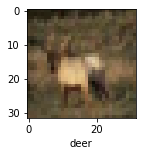

In [10]:
plot_sample(X_train, y_train, 3)

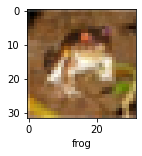

In [11]:
plot_sample(X_train, y_train, 0)

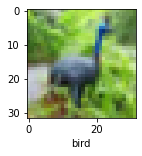

In [12]:
plot_sample(X_train, y_train, 6)

<h6>showing some images from dataset by using loop,subplot . figsize function is used to define the figure size of images</h6>

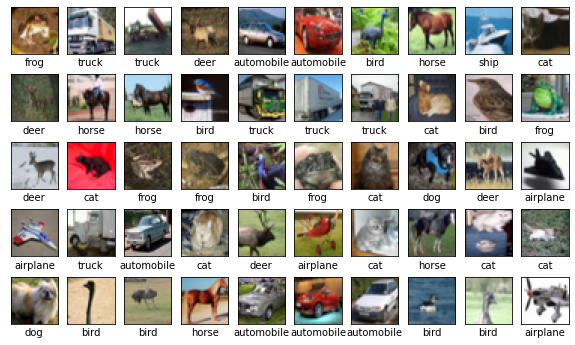

In [13]:
plt.figure(figsize=(10,6))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    
    plt.xlabel(classes[y_train[i]])
plt.show()

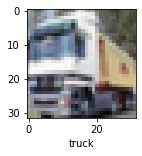

In [14]:
plot_sample(X_train, y_train, 1)

<h4 style="color:blue">Normalizing the training data into 0 to 1 by dividing 255.0(For RGB )</h4>

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.8655 - accuracy: 0.3337
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6613 - accuracy: 0.4119
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5735 - accuracy: 0.4437
Epoch 4/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5076 - accuracy: 0.4683
Epoch 5/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.4585 - accuracy: 0.4849


<h4 style="color:blue"> At the end of 5 epochs, accuracy is at around 48.49% <h4>

<h4 style="color:purple">classification report all the catagory using following ann</h4>

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.56      1000
           1       0.53      0.69      0.60      1000
           2       0.28      0.54      0.37      1000
           3       0.35      0.38      0.37      1000
           4       0.39      0.40      0.40      1000
           5       0.60      0.17      0.26      1000
           6       0.59      0.35      0.44      1000
           7       0.53      0.56      0.54      1000
           8       0.61      0.62      0.62      1000
           9       0.64      0.43      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



 <h4>building a convolutional neural network to train the images<h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h4>using cnn.fit with epochs=10 to showing the accurcy <h4> 

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4905 - accuracy: 0.4681
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1283 - accuracy: 0.6034
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9967 - accuracy: 0.6524
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9091 - accuracy: 0.6855
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8419 - accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7821 - accuracy: 0.7270
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7347 - accuracy: 0.7460
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6937 - accuracy: 0.7603
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6564 - accuracy: 0.7715
Epoch 10/10
1563/1563 [==============================] - 31s 20m

**With CNN, at the end 5 epochs, accuracy was at around 70.62% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

<h4>to test the accuracy of the CNN evaluate use and accuracy found 68.99% <h4>


In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.9350 - accuracy: 0.6899


[0.9349570274353027, 0.6898999810218811]

<h3>after normalized the values from 0 to 1 in the array<h3>

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.16840611e-04, 7.65534642e-05, 2.58882320e-03, 9.05531764e-01,
        1.22663227e-03, 4.99310717e-02, 1.20807355e-02, 2.44966388e-04,
        2.74131130e-02, 2.89530057e-04],
       [4.10554669e-04, 2.69329622e-02, 4.27278678e-07, 2.32528024e-08,
        7.18262472e-09, 7.83863641e-10, 9.46618894e-10, 1.26643529e-10,
        9.72604871e-01, 5.11669095e-05],
       [6.82525039e-02, 1.21719111e-02, 9.35771875e-03, 4.75666486e-03,
        1.04245460e-02, 5.75288082e-04, 2.31531332e-04, 3.02647986e-03,
        8.50334287e-01, 4.08691019e-02],
       [7.45630205e-01, 2.46857218e-02, 3.08375526e-02, 1.24076533e-03,
        6.88126544e-04, 2.37885815e-05, 1.73427434e-05, 4.16370167e-05,
        1.96487769e-01, 3.47080058e-04],
       [3.67852272e-06, 2.63793390e-05, 8.25544447e-02, 3.78949940e-02,
        1.17782526e-01, 3.43054929e-03, 7.58266151e-01, 1.15280163e-05,
        2.79712112e-05, 1.80919528e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [26]:
y_test[:]

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

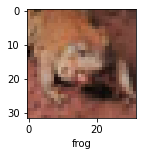

In [27]:
plot_sample(X_test, y_test,5)

<h5>printing the level name using classes<h5> 

In [28]:
classes[y_classes[5]]

'frog'

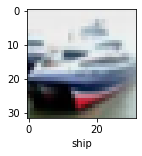

In [29]:
plot_sample(X_test, y_test,1)

In [30]:
classes[y_classes[1]]

'ship'